# HomeWork 6

**DeadLine : 12:00 PM 12 Aban 1399**

**Total points : 125 pts**


Import some prerequisites

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting

In [5]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [6]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# PART 4A

**Point : 15 pts**

Here is for your helper functions(optional)

Implement this function to detect and remove circles in the given image.

In [102]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY) 
    out_img_blurred = cv2.GaussianBlur(out_img,(3,3),1)
    
    detected_circles = cv2.HoughCircles(out_img_blurred,cv2.HOUGH_GRADIENT ,1, 20, param1 = 100, 
               param2 = 30) 
    
    if detected_circles is not None:
        detected_circles = np.around(detected_circles)

        for pt in detected_circles[0, :]: 
            a, b, r = pt[0], pt[1], pt[2] 

            for i in range(len(image)):
                for j in range(len(image[i])):
                    if np.sqrt(np.square(i - b) + np.square(j - a)) <= (r + (r/15)):
                        image[i][j] = 0

    return image

Test your implementation (dont change this cell)

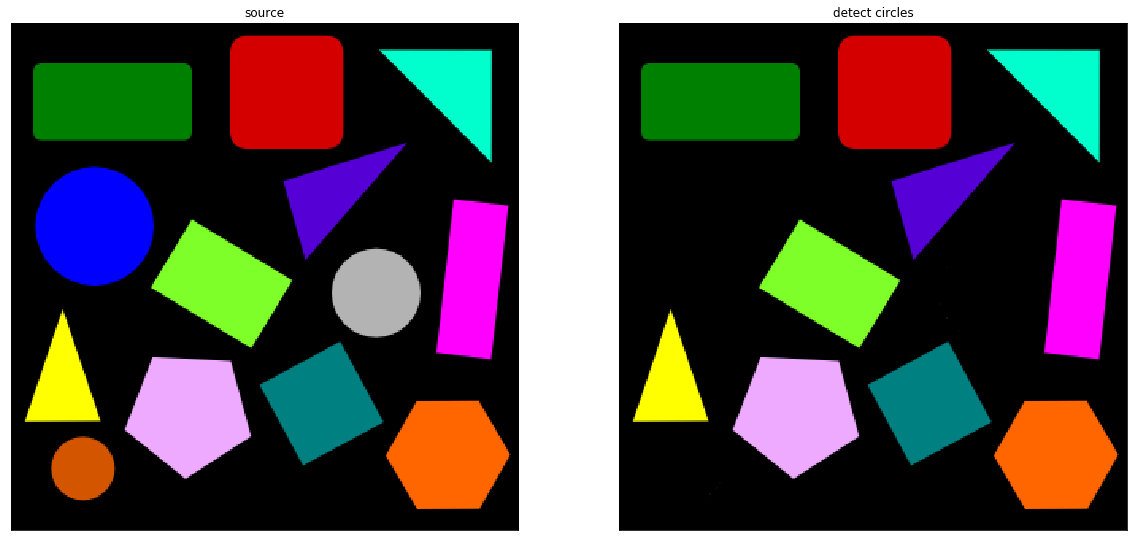

In [103]:
image_list = []

image = cv2.imread(os.path.join('images', '1.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# PART 4B

**Point : 15 pts**

Implement this function to detect lines in the given image with hough algorithm.

In [355]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    
    out_img = cv2.cvtColor(out_img,cv2.COLOR_BGR2GRAY)
    out_img_blurred = cv2.GaussianBlur(out_img,(3,3),1)
    
    edges = cv2.Canny(out_img_blurred, 30, 110)
    
    rho = 0.05  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 1  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 0.5  # minimum number of pixels making up a line
    max_line_gap = 2  # maximum gap in pixels between connectable line segments

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,255,255),2)

    return image

Test your implementation (dont change this cell)

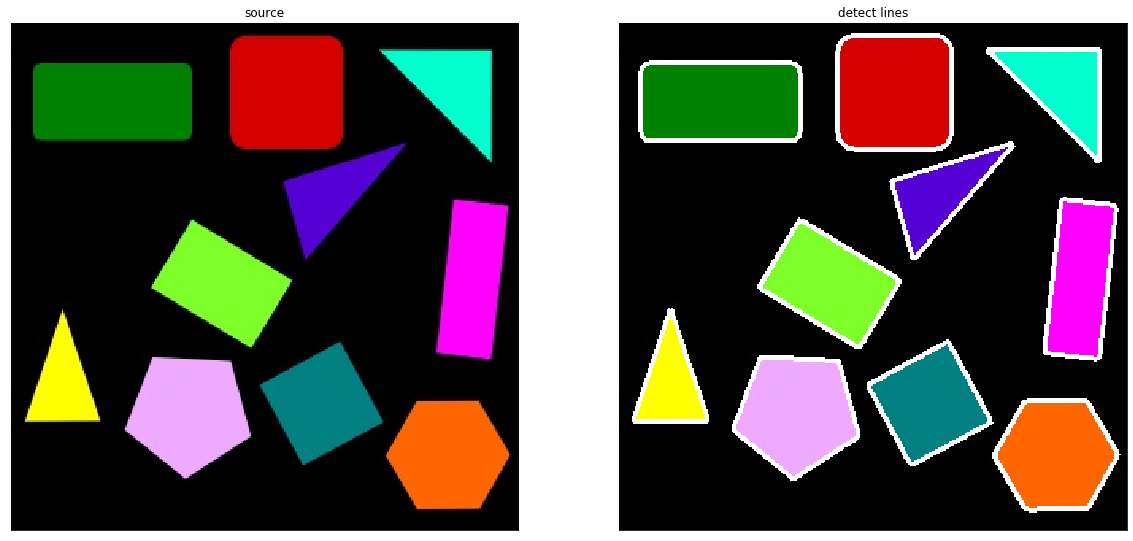

In [356]:
image_list = []

image = cv2.imread(os.path.join('images', '1b.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(np.array(image))

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

In [1380]:
def find_points(h,w,img):
    points = []
    for i in range(h):
        for j in range(w):
            if img[i][j] != 0:
                points.append((float(i),float(j)))
    return points

def find_line_distance(p1,p2,p):
    x2,y2 = p2
    x1,y1 = p1
    x0,y0 = p
    return np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)/np.sqrt(np.square(y2-y1)+np.square(x2-x1))
    
def evaluate(points,p1,p2,threshold):
    inliers = 0
    inlier_points = []
    for p in points:
        d = find_line_distance(p1,p2,p)
        if d < threshold:
            inliers += 1
            inlier_points.append(p)

    return inliers, np.array(inlier_points)

Implement RANSAC function here.

In [1381]:
def ransac(image):
    '''
    Gets input image and return rho and theta of line detected. 
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    '''

    img = image.copy()
    h, w = img.shape
    rho, theta = 0, 0
    points = find_points(h,w,img)
    best_model = None
    best_inliers = np.array([])
    threshold = 1
    best_evaluation = float('-inf')
    min_inliers = float('inf')
    
    iter = 24
    for i in range(iter):
        idx0, idx1 = np.random.randint(0,len(points),2)
        while idx0 == idx1:
            idx0, idx1 = np.random.randint(0,len(points),2)
        p1, p2 = points[idx0], points[idx1]
        
        evaluation, inlier_coords = evaluate(points,p1,p2,threshold)
        if evaluation > best_evaluation:
            best_evaluation = evaluation
            best_inliers = inlier_coords
            best_model = p1, p2

    y_bar, x_bar = np.mean(best_inliers,axis=0)
    y2_bar, x2_bar = np.mean(np.square(best_inliers),axis=0)
    x_bar2, y_bar2 = np.square(x_bar), np.square(y_bar)
    xy_bar = np.sum((best_inliers.T[0] * best_inliers.T[1]),axis=0)/len(best_inliers)
    theta = 0.5 * np.arctan((2*(xy_bar - x_bar*y_bar))/(x2_bar - y2_bar - x_bar2 + y_bar2))
    rho = x_bar * np.cos(theta) + y_bar*np.sin(theta)
    return rho , theta

Test your implementation (dont change this cell)

19.548673976684718 -0.056423940867523885
75 997 -36 -999


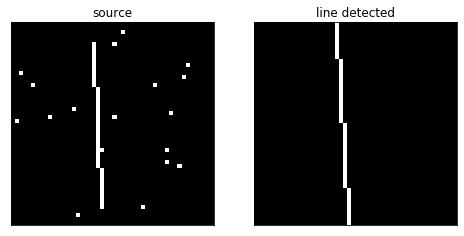

In [1382]:
image_list = []
image = cv2.imread(os.path.join('images', '2.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta = ransac(image)
print(rho, theta)
x1, y1, x2, y2 = pol_to_car(rho, theta)
print(x1, y1, x2, y2)
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'q5')

# PART 6

**Point : 25pts**

Here is for your helper functions(optional)

Implement this function for return rho and theat of line detected and hough transform image.

In [1292]:
def hough_transform_line(image):
    '''
    Returns rho and theat of line detected and hough transform image.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): Angle from origin to the line.
        theta (float): The distance from the origin to the line.
        hough_transform (numpy.ndarray): Hough transform image.
    '''
    theta_step = 1
    
    img = image.copy()
    h,w = img.shape
    accumulator = np.zeros_like(img)
    rho, theta = 0, 0
    rho_size = int(np.sqrt(np.square(h) + np.square(w)))
    thetas = np.deg2rad(np.arange(0,180,step=1))
    rhos = np.linspace(-int(rho_size), int(rho_size), int(rho_size * 2.0))
    
    accumulator = np.zeros((2*rho_size, len(thetas)))
    print(accumulator.shape)
    edges = cv2.Canny(img, 30, 110)
    edge_positions = np.where(edges != 0)
    
    cos_theta = np.cos(thetas)
    sin_theta = np.sin(thetas)
    
    for i in range(len(edge_positions[0])):
        y, x = edge_positions[0][i],edge_positions[1][i]
        rho_idx = x * cos_theta + y * sin_theta
        for j in range(len(thetas)):
            accumulator[int(rho_idx[j] + rho_size)][j] += 1
            
    rho = rhos[np.argmax(accumulator)//180]
    theta = thetas[np.argmax(accumulator)% 180]
    
    return rho, theta, accumulator

Test your implementation (dont change this cell)

(140, 180)


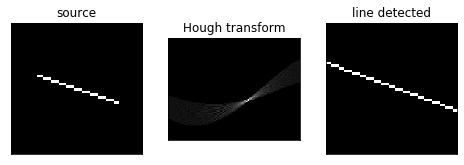

In [1293]:
image_list = []
image = cv2.imread(os.path.join('images', '3.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta, hough_transform = hough_transform_line(image)
x1, y1, x2, y2 = pol_to_car(rho, theta)
image_list.append([hough_transform, 'Hough transform', 'img'])
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'q6')

for create proper files for sending in quera run this cell.

In [1383]:
!python notebook_converter.py

End!!!